To look at each model click below:




- [Count Vectorizer with parameters](#count)
- [TF-IDF with Parameters](#tf)
- [Logistic Regression](#log)
- [Naive Bayes CV (multinomial)](#naive-cv)
- [NB TF-IDF](#naive-tf)
- [Random Forests CV](#forests-cv) 
- [Random Forests TF-IDF](#forests-tf) 
- [Best Performing Models](#best) 
- [Visualizations](#vis) 

In [79]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import svm
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
reddit_df = pd.read_csv('./cleaned_subreddits.csv')

In [46]:
reddit_df = reddit_df.drop(['Unnamed: 0'], axis = 1)

In [47]:
reddit_df.head()

,Titles,Subreddit_nottheonion
0,"plant-based meat sales rise, fueled by carnivores",1
1,someone is using gabe newell’s face to sell un...,1
2,"coming soon: brunchables, for when you want lu...",1
3,'close your legs' judge in nj sex case faces s...,1
4,washington department of corrections quietly b...,1


In [48]:
#727 unique values 
print('unique values:', len(set(reddit_df['Titles'])))

print('shape df:', reddit_df.shape)

unique values: 1338
shape df: (1375, 2)


In [49]:
X = reddit_df['Titles']
y= reddit_df['Subreddit_nottheonion']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42,
                                                   stratify = y)

<a id='count'></a>
# Count Vectorizer with parameters 


What does countVectorizer do? 

In [51]:
cv = CountVectorizer()

# Fit the vectorizer on our corpus and transform
X_train_cv = cv.fit_transform(X_train)
X_train_cv = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())

# Transform the test set
X_test_cv = cv.transform(X_test)

In [52]:
#GridSearch CV
pipe2 = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression(solver = 'liblinear'))
])

params = {'cv__max_features': ([2000, 2500, 3000]),
         'cv__ngram_range': ([(1,1), (1,2), (2,2)])}


gs = GridSearchCV(pipe2, param_grid = params, cv = 5)
gs.fit(X_train, y_train) 
print(gs.best_score_)
print(gs.best_params_)

print('CV train score:', gs.score(X_train, y_train))
print('CV test score:', gs.score(X_test, y_test))

0.7963142580019399
{'cv__max_features': 2500, 'cv__ngram_range': (1, 1)}
CV train score: 0.9932104752667313
CV test score: 0.813953488372093


<a id='tf'></a>
# TF-IDF with Parameters

In [53]:
# TF-IDF
#Set Pipeline
pipe2 = Pipeline([
    ('tf', TfidfVectorizer()),
    ('lr', LogisticRegression(solver = 'liblinear'))
])

#Make Parameters
params2 = {
    'tf__stop_words': [None, 'english'],
    'tf__ngram_range': [(1,1), (1,2), (2,2)],
    'tf__max_features': [250, 500, 900]
}

#Gridsearching
gs = GridSearchCV(pipe2, param_grid = params2, cv = 5)
gs.fit(X_train, y_train)  #also does CV in the background
print(gs.best_score_)
gs.best_params_

0.7478176527643065


{'tf__max_features': 900, 'tf__ngram_range': (1, 1), 'tf__stop_words': None}

In [54]:
tf = TfidfVectorizer(ngram_range=(1,1), max_features=900, stop_words='english')

# Fit the vectorizer on our corpus and transform
X_train_tf = tf.fit_transform(X_train)
X_train_tf_df = pd.DataFrame(X_train_tf.toarray(), columns=tf.get_feature_names())

# Transform the test set
X_test_tf = tf.transform(X_test)

Between TF-IDF and CrossVal, we get a better score with TF-IDF. 

However, I'm going to compare/contrast the differences in my models if I use CrossVal or TF-IDF, just to see what actually happens within each model. 

<a id='log'></a>
# Logistic Regression

In [55]:
#penalty at l1
# Instantiate model
logreg = LogisticRegression(penalty = 'l1')

# Fit on training data.
logreg.fit(X_train_cv, y_train)

# Get scores
print('CV score LogReg:', cross_val_score(logreg, X_train_cv, y_train, cv=5).mean())
print('Training accuracy LogReg:', logreg.score(X_train_cv, y_train))
print('Testing accuracy LogReg:', logreg.score(X_test_cv, y_test))

/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

CV score LogReg: 0.7623563622719385
Training accuracy LogReg: 0.8913676042677012
Testing accuracy LogReg: 0.752906976744186


/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
#penalty at l2
# Instantiate model
logreg = LogisticRegression(penalty = 'l2')

# Fit on training data.
logreg.fit(X_train_cv, y_train)

# Get scores
print('CV score LogReg:', cross_val_score(logreg, X_train_cv, y_train, cv=5).mean())
print('Training accuracy LogReg:', logreg.score(X_train_cv, y_train))
print('Testing accuracy LogReg:', logreg.score(X_test_cv, y_test))

/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

CV score LogReg: 0.7924346888044651
Training accuracy LogReg: 0.9961202715809894
Testing accuracy LogReg: 0.8168604651162791


<a id='naive-cv'></a>
# Naive Bayes CV (Multinomial)

If i have time, I'll take a look at the alpha's and see what gives me the optimal score. I'm not positive this will be necessary since I already have pretty good accuracy scores. 

In [57]:
#Bag of words
train_corpus = X_train
test_corpus = X_test

# Instantiate a CountVectorizer
cvec_mult = CountVectorizer(stop_words='english', ngram_range = (2,2))

# Fit the vectorizer on our corpus
cvec_mult.fit(train_corpus)
#Set X_train
X_train_mult = cvec_mult.transform(train_corpus)
X_test_mult = cvec_mult.transform(test_corpus)

#CountVectorizer(ngram_range = (2,2)).fit(train_corpus).get_feature_names()

#Dataframe of bag of words at ngrams 2,2
X_train_cvec_2 = pd.DataFrame(X_train_mult.todense(), columns=cvec_mult.get_feature_names())
X_test_cvec_2 = pd.DataFrame(X_test_mult.todense(), columns=cvec_mult.get_feature_names())

In [58]:
# Instantiate model
mult_hyper = MultinomialNB()

# Set model params for GridSearch
mult_params = {
    'alpha':[0.05, 0.01, 0.1]
}

# Do GridSearch
gs = GridSearchCV(mult_hyper, param_grid=mult_params, cv=5)
gs.fit(X_train_cvec_2, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.39282250242483024
{'alpha': 0.01}


In [59]:
#Set up multinomial model with CV
mult = MultinomialNB(alpha = 0.01)

mult_model = mult.fit(X_train_cvec_2, y_train)

# Get scores
print('CV score Naive Bayes & Count Vectorizer:', cross_val_score(mult, X_train_cvec_2, y_train, cv=5).mean())
print('Training accuracy Naive Bayes & Count Vectorizer:', mult.score(X_train_cvec_2, y_train))
print('Testing accuracy Naive Bayes & Count Vectorizer:', mult.score(X_test_cvec_2, y_test))

CV score Naive Bayes & Count Vectorizer: 0.3928286665728625
Training accuracy Naive Bayes & Count Vectorizer: 0.9990300678952473
Testing accuracy Naive Bayes & Count Vectorizer: 0.7790697674418605


<a id='naive-tf'></a>
# Naive Bayes with TF-IDF

In [60]:
#Bag of words
train_corpus = X_train
test_corpus = X_test

# Instantiate a TF-IDF
tf_mult = TfidfVectorizer(ngram_range=(2,2), max_features=900, stop_words='english')

# Fit the vectorizer on our corpus
tf_mult.fit(train_corpus)
#Set X_train
X_train_mult_tf = tf_mult.transform(train_corpus)
X_test_mult_tf = tf_mult.transform(test_corpus)

#CountVectorizer(ngram_range = (2,2)).fit(train_corpus).get_feature_names()

#Dataframe of bag of words at ngrams 2,2
X_train_tf_2 = pd.DataFrame(X_train_mult_tf.todense(), columns=tf_mult.get_feature_names())
X_test_tf_2 = pd.DataFrame(X_test_mult_tf.todense(), columns=tf_mult.get_feature_names())

In [61]:
# Instantiate model
mult_hyper_tf = MultinomialNB()

# Set model params for GridSearch
mult_params_tf = {
    'alpha':[0.05, 0.01, 0.1]
}

# Do GridSearch
gs = GridSearchCV(mult_hyper_tf, param_grid=mult_params_tf, cv=5)
gs.fit(X_train_tf_2, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7032007759456838
{'alpha': 0.1}


In [62]:
mult_tvec = MultinomialNB(alpha = 0.1)

# Fit model
mult_tvec.fit(X_train_tf_2, y_train)

print('CV score Naive Bayes & TF-IDF:', cross_val_score(mult_tvec, X_train_tf_2, y_train, cv=5).mean())
print('Training accuracy Naive Bayes & TF-IDF:', mult_tvec.score(X_train_tf_2, y_train))
print('Testing accuracy Naive Bayes & TF-IDF:', mult_tvec.score(X_test_tf_2, y_test)) 

CV score Naive Bayes & TF-IDF: 0.7031893438394071
Training accuracy Naive Bayes & TF-IDF: 0.8816682832201745
Testing accuracy Naive Bayes & TF-IDF: 0.7441860465116279


In [94]:
coef = mult_tvec.coef_

In [198]:
coefs_df = pd.DataFrame(coef, 
                        columns=[tf_mult.get_feature_names()]).T

coefs_df = coefs_df.reset_index()
coefs_df = coefs_df.rename(columns = {'level_0':'words', 0: 'coef'})

coefs_df.sort_values(by = 'coef')

,words,coef
449,placing new,-8.147367
548,powerpoint company,-8.147367
549,powerpoint opened,-8.147367
550,pr nightmare,-8.147367
551,pr stunt,-8.147367
552,precious time,-8.147367
553,president cathartic,-8.147367
554,president invasion,-8.147367
555,president jared,-8.147367
556,president standing,-8.147367


In [199]:
coefs.head(10)

,0
000 000,-5.749472
000 years,-5.749472
12 year,-6.364700
13 year,-8.147367
150 staff,-6.059081
20 years,-5.102845
37 water,-8.147367
750 000,-8.147367
8m bullying,-5.253055
abrams state,-8.147367


<a id='forests-cv'></a>
# Random Forests CV

In [66]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Set model params for GridSearch
rf_params = {
    'n_estimators': [15, 20, 25],
    'max_depth': [200, 250, 300],
    'max_features': [20, 25, 50]
}

# Do GridSearch
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train_cv, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7487875848690592
{'max_depth': 200, 'max_features': 25, 'n_estimators': 20}


In [67]:
# Instantiate model
rf_cv = RandomForestClassifier(max_depth = 200, n_estimators=25, 
                               max_features=50, random_state=42)

# Fit model
rf_cv.fit(X_train_cv, y_train)

# Get scores
print('CV score Random Forest & Count Vectorizer:', cross_val_score(rf_cv, X_train_cv, y_train, cv=5).mean())
print('Training accuracy Random Forest & Count Vectorizer:', rf_cv.score(X_train_cv, y_train))
print('Testing accuracy Random Forest & Count Vectorizer:', rf_cv.score(X_test_cv, y_test))

CV score Random Forest & Count Vectorizer: 0.7400778575113738
Training accuracy Random Forest & Count Vectorizer: 0.9951503394762367
Testing accuracy Random Forest & Count Vectorizer: 0.752906976744186


<a id='forests-tf'></a>
# Random Forests TF-IDF

In [68]:
#Instantiating TF-IDF
tf_rf = TfidfVectorizer(ngram_range=(1,1), max_features=900, stop_words='english')

# Fit the vectorizer on our corpus and transform
X_train_rf = tf_rf.fit_transform(X_train).toarray()

# Transform the test set
X_test_rf = tf_rf.transform(X_test)

rf_tvec = RandomForestClassifier(max_depth = 200, n_estimators=20, 
                                 max_features=50, random_state=42)

rf_tvec.fit(X_train_tf, y_train)


# Get scores
print('CV score Random Forest & TF-IDF:', cross_val_score(rf_tvec, X_train_rf, y_train, cv=5).mean())
print('Training accuracy Random Forest & TF-IDF:', rf_tvec.score(X_train_rf, y_train))
print('Testing accuracy Random Forest & TF-IDF:', rf_tvec.score(X_test_rf, y_test))

CV score Random Forest & TF-IDF: 0.7575160639744853
Training accuracy Random Forest & TF-IDF: 0.988360814742968
Testing accuracy Random Forest & TF-IDF: 0.7674418604651163


<a id='best'></a>
# Best Performing Model: 

In [69]:
#re-printing out all my scores so I can best evaluate which model performed the best below

print('CV score LogReg Lasso:', round(cross_val_score(logreg, X_train_cv, y_train, cv=5).mean(), 4))
print('Training accuracy LogReg Lasso:', round(logreg.score(X_train_cv, y_train), 4))
print('Testing accuracy LogReg Lasso:', round(logreg.score(X_test_cv, y_test), 4))

print('--------------------------------------------------')

print('CV score LogReg Ridge:', round(cross_val_score(logreg, X_train_cv, y_train, cv=5).mean(), 4))
print('Training accuracy LogReg Ridge:', round(logreg.score(X_train_cv, y_train), 4))
print('Testing accuracy LogReg Ridge:', round(logreg.score(X_test_cv, y_test), 4))

print('--------------------------------------------------')

print('CV score Naive Bayes & Count Vectorizer(Mult):', cross_val_score(mult, X_train_cvec_2, y_train, cv=5).mean())
print('Training accuracy Naive Bayes & Count Vectorizer(Mult):', mult.score(X_train_cvec_2, y_train))
print('Testing accuracy Naive Bayes & Count Vectorizer (Mult):', mult.score(X_test_cvec_2, y_test))

print('--------------------------------------------------')

print('CV score Naive Bayes & TF-IDF (Mult):', cross_val_score(mult_tvec, X_train_tf_2, y_train, cv=5).mean())
print('Training accuracy Naive Bayes & TF-IDF (Mult):', mult_tvec.score(X_train_tf_2, y_train))
print('Testing accuracy Naive Bayes & TF-IDF (Mult):', mult_tvec.score(X_test_tf_2, y_test)) 

print('--------------------------------------------------')

print('CV score Random Forest & Count Vectorizer:', round(cross_val_score(rf_cv, X_train_cv, y_train, cv=5).mean(), 4))
print('Training accuracy Random Forest & Count Vectorizer:', rf_cv.score(X_train_cv, y_train))
print('Testing accuracy Random Forest & Count Vectorizer:', round(rf_cv.score(X_test_cv, y_test), 4))

print('--------------------------------------------------')

print('CV score Random Forest & TF-IDF:', round(cross_val_score(rf_tvec, X_train_rf, y_train, cv=5).mean(), 4))
print('Training accuracy Random Forest & TF-IDF:', rf_tvec.score(X_train_rf, y_train))
print('Testing accuracy Random Forest & TF-IDF:', rf_tvec.score(X_test_rf, y_test))

CV score LogReg Lasso: 0.7924


/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

Training accuracy LogReg Lasso: 0.9961
Testing accuracy LogReg Lasso: 0.8169
--------------------------------------------------
CV score LogReg Ridge: 0.7924
Training accuracy LogReg Ridge: 0.9961
Testing accuracy LogReg Ridge: 0.8169
--------------------------------------------------


/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CV score Naive Bayes & Count Vectorizer(Mult): 0.3928286665728625
Training accuracy Naive Bayes & Count Vectorizer(Mult): 0.9990300678952473
Testing accuracy Naive Bayes & Count Vectorizer (Mult): 0.7790697674418605
--------------------------------------------------
CV score Naive Bayes & TF-IDF (Mult): 0.7031893438394071
Training accuracy Naive Bayes & TF-IDF (Mult): 0.8816682832201745
Testing accuracy Naive Bayes & TF-IDF (Mult): 0.7441860465116279
--------------------------------------------------
CV score Random Forest & Count Vectorizer: 0.7401
Training accuracy Random Forest & Count Vectorizer: 0.9951503394762367
Testing accuracy Random Forest & Count Vectorizer: 0.7529
--------------------------------------------------
CV score Random Forest & TF-IDF: 0.7575
Training accuracy Random Forest & TF-IDF: 0.988360814742968
Testing accuracy Random Forest & TF-IDF: 0.7674418604651163


**It seems that the best performing model is Naive Bayes with TF-IDF.**

<a id='vis'></a>
# Visualizations

In [70]:
# Fit model
model = mult_tvec.fit(X_train_tf_2, y_train)

#Getting predictions
predictions = model.predict(X_test_tf_2)

from sklearn.metrics import confusion_matrix

#Setting up confusion matrix variables
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('--------------------')

#Accuracy
accuracy = round((tp + tn) / (tn + fp + fn + tp), 4)
print('Accuracy:', accuracy)

#Specificity
specificity = tn / tn + fp
print('Specificity:', specificity)

#Sensitivity
sensitivity = tp / tp + fn
print('Sensitivity:', sensitivity)

#Misclassification Rate
misclassification = round((fp + fn)/ (tn + fp + fn + tp), 4)
print('Misclassification:', misclassification)

#Precision rate
precision = round(tp / (fp + tp), 4)

print('Precision:', precision)

True Negatives: 243
False Positives: 1
False Negatives: 87
True Positives: 13
--------------------
Accuracy: 0.7442
Specificity: 2.0
Sensitivity: 88.0
Misclassification: 0.2558
Precision: 0.9286


**For the sake of visualization, I'm going to bring back logistic regression to see how well this model actually does.**

In [71]:
# Instantiate model
logreg = LogisticRegression()

# Fit on training data.
logreg.fit(X_train_cv, y_train)

pred_log = logreg.predict(X_test_cv)

confusion_matrix(y_test, pred_log)

/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[235,   9],
       [ 54,  46]])

In [72]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_log).ravel()

sens = tp/(tp+fn)
spec = tn/(tn+fp)
print(f'Specificity: {round(spec,4)}')
print(f'Sensitivity: {round(sens,4)}')

Specificity: 0.9631
Sensitivity: 0.46


In [73]:
pred_proba = [i[1] for i in logreg.predict_proba(X_test_cv)]

preds_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

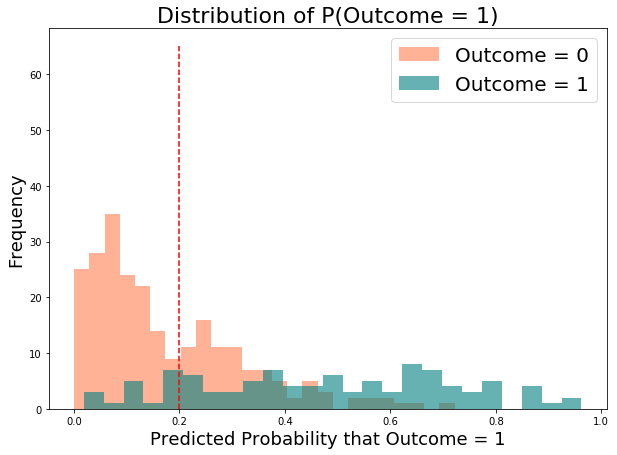

In [74]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(preds_df[preds_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='coral',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(preds_df[preds_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='teal',
         alpha = 0.6,
         label='Outcome = 1')
# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x=0.2,
           ymin = 0,
           ymax = 65,
           color='r',
           linestyle = '--')
# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

<function matplotlib.pyplot.show(*args, **kw)>

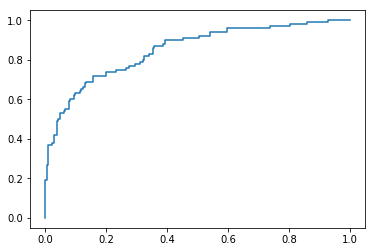

In [75]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,_= roc_curve(y_test, pred_proba)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.show

Caveats:
- My data is seriously skewed
- I thought about randomly dropping values from The Onion so my data set was equal. I couldn't honestly justify that as a good way to fit and evaluate this model. 
- if i had more time, I would have weighted certain words more significantly than others. 